<a href="https://colab.research.google.com/github/natdebandi/migmobs_exploratory/blob/main/MIGMOBS_migration_stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MIGMOBS

**Natalia Dedandi**



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Migration data

from:

https://riks.cris.unu.edu/annual-bilateral-migration-data


In [4]:
# Replace 'your_file_path' with the actual path to your CSV file in Google Drive
file_path = '/content/drive/MyDrive/3. Proyectos/MIGMOBS_nat/3_data_repository/migration_imputed_RIKS_dec2021.csv'

df2 = pd.read_csv(file_path)
print(df2.head())

  iso_or               origin iso_des destination  year  stock  flow  inflow  \
0    AAB  Antigua and Barbuda     ABW       Aruba  1960     16   NaN     NaN   
1    AAB  Antigua and Barbuda     ABW       Aruba  1961     16   0.0     NaN   
2    AAB  Antigua and Barbuda     ABW       Aruba  1962     15  -1.0     NaN   
3    AAB  Antigua and Barbuda     ABW       Aruba  1963     15   0.0     NaN   
4    AAB  Antigua and Barbuda     ABW       Aruba  1964     15   0.0     NaN   

   outflow  
0      NaN  
1      NaN  
2      NaN  
3      NaN  
4      NaN  


In [5]:
countries = ['ARG', 'CHL']
latam_mig_df = df2[df2['iso_des'].isin(countries)]


In [6]:
latam_mig_df_grp = latam_mig_df.groupby(['year', 'iso_des'])['stock'].sum().reset_index()
latam_mig_df_grp

,year,iso_des,stock
0,1960,ARG,2683416
1,1960,CHL,109563
2,1961,ARG,2630230
3,1961,CHL,108385
4,1962,ARG,2636364
...,...,...,...
117,2018,CHL,1207629
118,2019,ARG,2214059
119,2019,CHL,1399076
120,2020,ARG,2245714


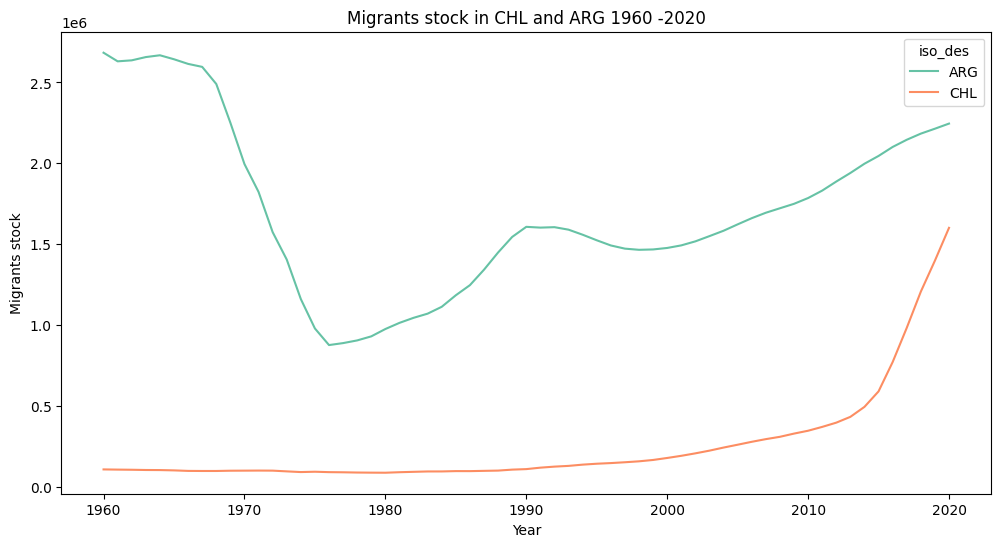

In [7]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='stock', hue='iso_des', data=latam_mig_df_grp, palette = "Set2")
plt.title('Migrants stock in CHL and ARG 1960 -2020')
plt.xlabel('Year')
plt.ylabel('Migrants stock')
plt.show()

Flujos migratorios - Base CRISK

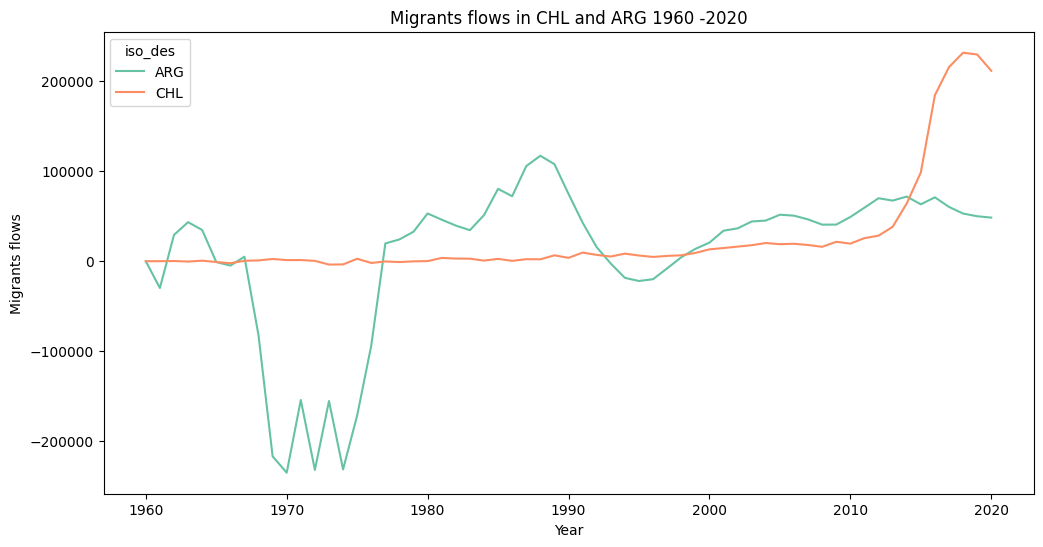

In [10]:
latam_mig_df_grp = latam_mig_df.groupby(['year', 'iso_des'])['flow'].sum().reset_index()
latam_mig_df_grp

plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='flow', hue='iso_des', data=latam_mig_df_grp, palette = "Set2")
plt.title('Migrants flows in CHL and ARG 1960 -2020')
plt.xlabel('Year')
plt.ylabel('Migrants flows')
plt.show()

Para analizar la % de migrantes tomo la base de población ONU y estos datos de CRIS. El indicador de Banco Mundial (I3.2 International migrant stock (% of population) tiene muchos valores ausentes.

Falta verificar si hay mejores datos

Ya tengo en el DF population los datos de la población para ARG y CHL entre 1960 y 2020

In [ ]:
latam_mig_df_grp = latam_mig_df_grp.rename(columns={'iso_des': 'country_code'})

In [ ]:
# Combinar los datos por país y año
merged_data = pd.merge(latam_mig_df_grp, population_data, on=['country_code', 'year'], how='inner')

# Calcular la nueva variable
merged_data['migration_proportion'] = merged_data['stock'] / merged_data['total_population_wb']

# Mostrar las primeras filas del resultado
print(merged_data.head())

   year country_code    stock  total_population_wb  migration_proportion
0  1960          ARG  2683416           20386045.0              0.131630
1  1960          CHL   109563            8153350.0              0.013438
2  1961          ARG  2630230           20726276.0              0.126903
3  1961          CHL   108385            8324802.0              0.013020
4  1962          ARG  2636364           21072538.0              0.125109


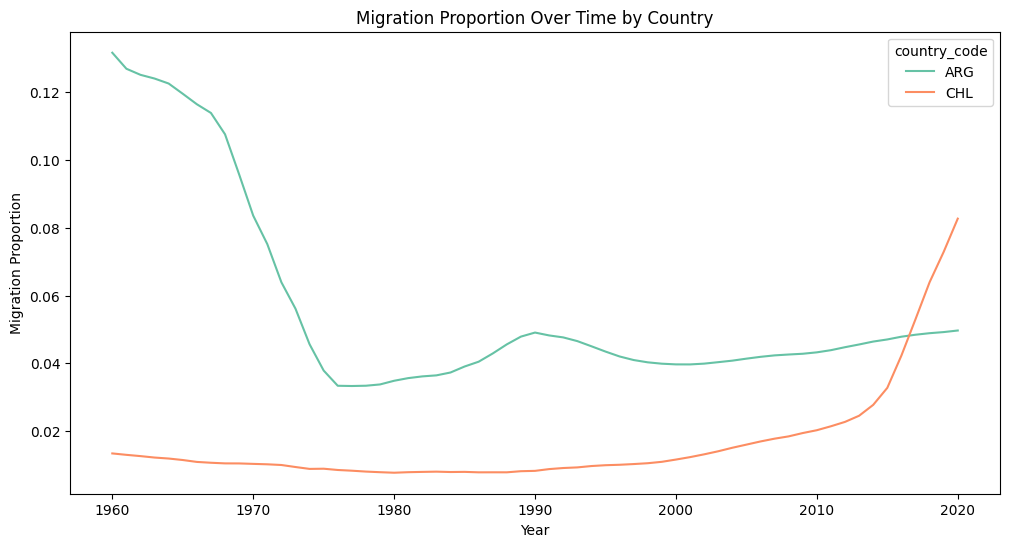

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='migration_proportion', hue='country_code', data=merged_data, palette = "Set2")
plt.title('Migration Proportion Over Time by Country')
plt.xlabel('Year')
plt.ylabel('Migration Proportion')
plt.show()

In [ ]:
top5_iso_or_arg = latam_mig_df[latam_mig_df['iso_des'] == 'ARG'].groupby(['year', 'iso_or'])['stock'].sum().reset_index()
top5_iso_or_arg = top5_iso_or_arg.sort_values(['year', 'stock'], ascending=[True, False]).groupby('year').head(5)
top5_iso_or_arg

,year,iso_or,stock
96,1960,ITA,922057
185,1960,SPN,745871
151,1960,PAR,158613
38,1960,CHL,116570
156,1960,POL,113675
...,...,...,...
13153,2020,PAR,685696
13075,2020,BOL,423522
13082,2020,CHL,215150
13154,2020,PER,197795


Obtengo todos los paises que fueron top 5 desde 1960 y se grafican los cambios

In [ ]:
print(top5_iso_or_arg['iso_or'].unique())

['ITA' 'SPN' 'PAR' 'CHL' 'POL' 'URU' 'BOL' 'SUN' 'YUG' 'PER' 'VEN']


In [ ]:
origin_list=['ITA','SPN','PAR','CHL','POL','URU','BOL','SUN','YUG','PER','VEN']



In [ ]:
# prompt: filtrar latam_mig_df  por iso_des = ARG y iso_orig i origin_list

historic_top5_arg = latam_mig_df[(latam_mig_df['iso_des'] == 'ARG') & (latam_mig_df['iso_or'].isin(origin_list))]
historic_top5_arg.head()

,iso_or,origin,iso_des,destination,year,stock,flow,inflow,outflow
332920,BOL,Bolivia,ARG,Argentina,1960,93271,NaN,NaN,9145.0
332921,BOL,Bolivia,ARG,Argentina,1961,93772,1315.0,14609.0,13294.0
332922,BOL,Bolivia,ARG,Argentina,1962,92958,9.0,15025.0,15016.0
332923,BOL,Bolivia,ARG,Argentina,1963,91235,-902.0,15555.0,16457.0
332924,BOL,Bolivia,ARG,Argentina,1964,93882,3457.0,15677.0,12220.0


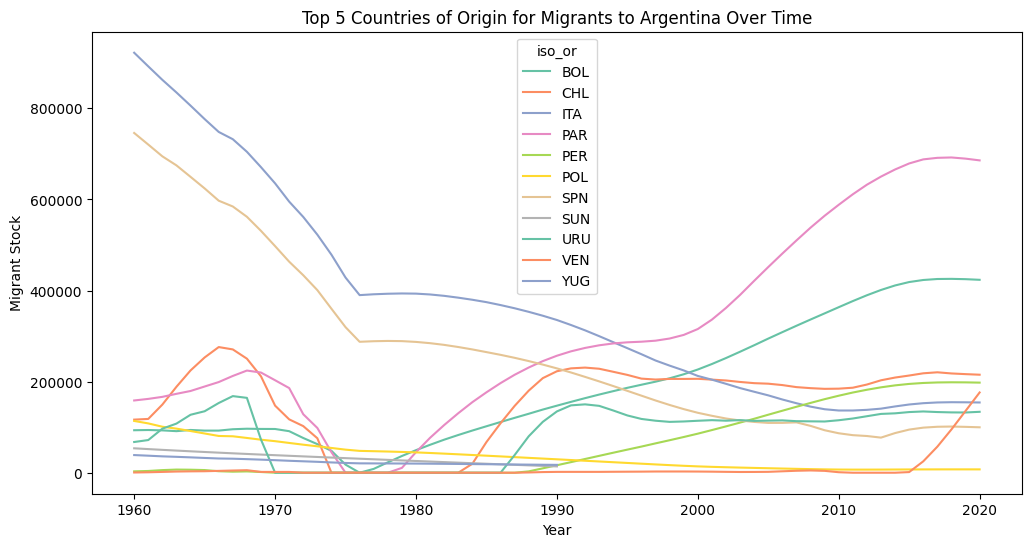

In [ ]:
# prompt: grafico de linea de stock del dataframe  top5_iso_or_arg por year

plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='stock', hue='iso_or', data=historic_top5_arg, palette = "Set2")
plt.title('Top 5 Countries of Origin for Migrants to Argentina Over Time')
plt.xlabel('Year')
plt.ylabel('Migrant Stock')
plt.show()

In [ ]:
top5_iso_or_chl = latam_mig_df[latam_mig_df['iso_des'] == 'CHL'].groupby(['year', 'iso_or'])['stock'].sum().reset_index()
top5_iso_or_chl = top5_iso_or_arg.sort_values(['year', 'stock'], ascending=[True, False]).groupby('year').head(5)

print(top5_iso_or_chl['iso_or'].unique())

['ITA' 'SPN' 'PAR' 'CHL' 'POL' 'URU' 'BOL' 'SUN' 'YUG' 'PER' 'VEN']


In [ ]:
origin_list=['ITA','SPN','PAR','CHL','POL','URU','BOL','SUN','YUG','PER','VEN']
historic_top5_chl = latam_mig_df[(latam_mig_df['iso_des'] == 'CHL') & (latam_mig_df['iso_or'].isin(origin_list))]
historic_top5_chl.head()

,iso_or,origin,iso_des,destination,year,stock,flow,inflow,outflow
334643,BOL,Bolivia,CHL,Chile,1960,8332,NaN,NaN,NaN
334644,BOL,Bolivia,CHL,Chile,1961,8382,141.0,NaN,NaN
334645,BOL,Bolivia,CHL,Chile,1962,8167,-126.0,NaN,NaN
334646,BOL,Bolivia,CHL,Chile,1963,7885,-197.0,NaN,NaN
334647,BOL,Bolivia,CHL,Chile,1964,7759,-46.0,NaN,NaN


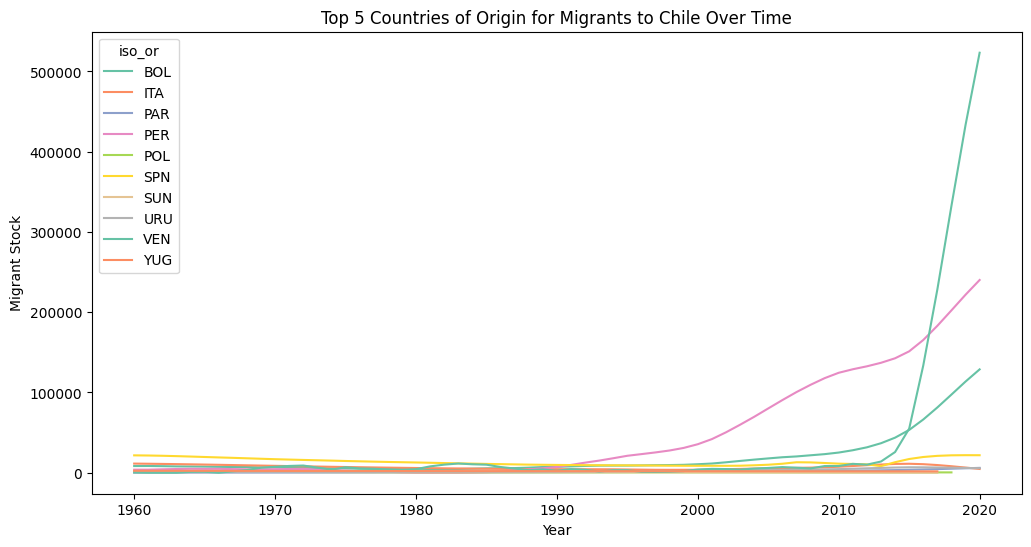

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='stock', hue='iso_or', data=historic_top5_chl, palette = "Set2")
plt.title('Top 5 Countries of Origin for Migrants to Chile Over Time')
plt.xlabel('Year')
plt.ylabel('Migrant Stock')
plt.show()

### Stock of migrants born in VEN, CHL BOL and living Argentina and Chile

In [ ]:
# Filter latam_mig_df for iso_des ARG
migration_origin = latam_mig_df[latam_mig_df['iso_or'].isin(["BOL", "VEN", "CHL","ARG"])]
migration_origin.head()

,iso_or,origin,iso_des,destination,year,stock,flow,inflow,outflow
112567,ARG,Argentina,CHL,Chile,1960,12054,NaN,NaN,NaN
112568,ARG,Argentina,CHL,Chile,1961,12224,302.0,NaN,NaN
112569,ARG,Argentina,CHL,Chile,1962,12313,219.0,NaN,NaN
112570,ARG,Argentina,CHL,Chile,1963,12475,290.0,NaN,NaN
112571,ARG,Argentina,CHL,Chile,1964,12701,352.0,NaN,NaN


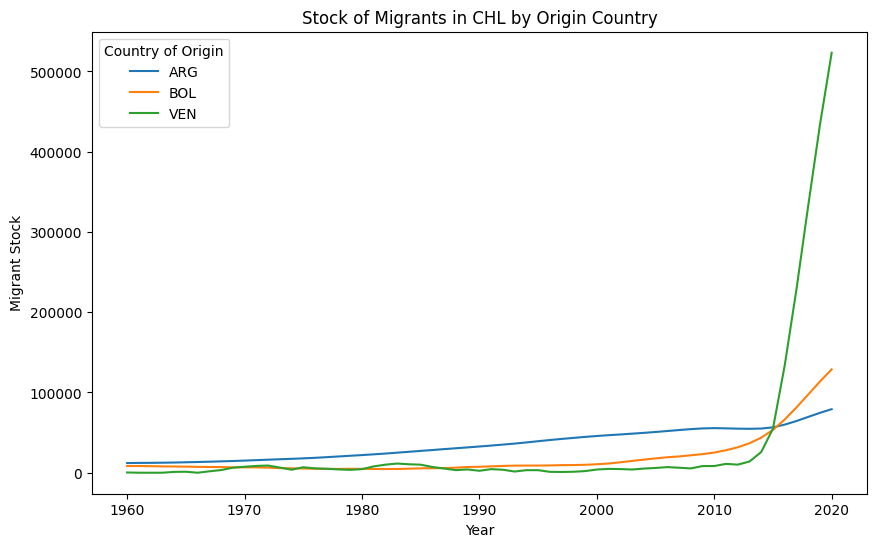

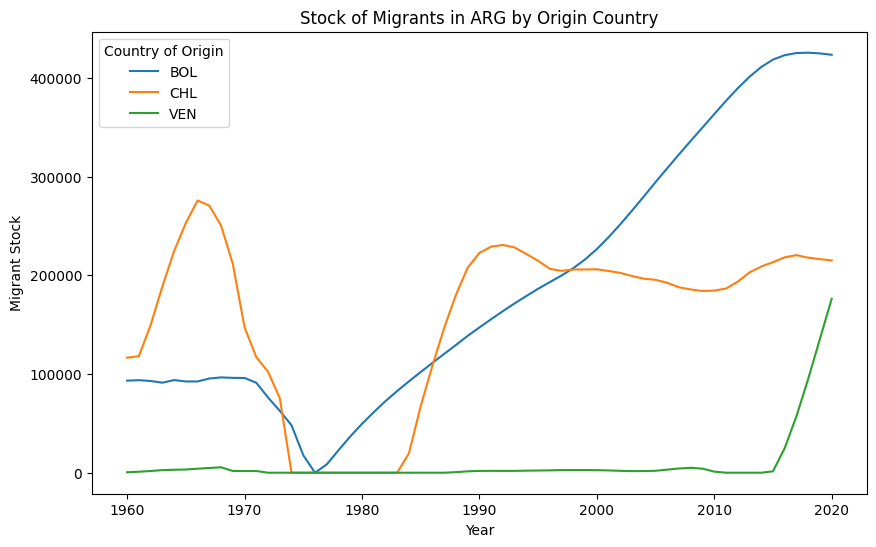

In [ ]:
# Iterate through unique destination countries
for iso_des in migration_origin['iso_des'].unique():
    # Filter data for the current destination country
    destination_data = migration_origin[migration_origin['iso_des'] == iso_des]

    plt.figure(figsize=(10, 6))

    # Iterate through unique origin countries for the current destination
    for iso_or in destination_data['iso_or'].unique():
        # Filter data for the current origin country
        origin_data = destination_data[destination_data['iso_or'] == iso_or]

        # Plot the line plot for the current origin country
        sns.lineplot(x='year', y='stock', data=origin_data, label=iso_or)

    # Set plot title and labels
    plt.title(f'Stock of Migrants in {iso_des} by Origin Country')
    plt.xlabel('Year')
    plt.ylabel('Migrant Stock')
    plt.legend(title='Country of Origin')
    plt.show()

Estos datos deben actualizarse con los datos más recientes censales y ajustar valores de población y migración con la información oficial.

## Combining mobility and migration data

Display total movement and stock data for these years

This does not provide any information

In [ ]:
## df the stock de migrantes en ARG y CHL: latam_mig_df
## stock total de migrantes por año : latam_mig_df_grp
## mobility database target ARG and CHL : mobility_df
## total trips to ARG and CHL by year: country_source_df_grp

total_mov_mig = pd.merge(country_source_df_grp, latam_mig_df_grp, on=['year', 'country_code'], how='left')

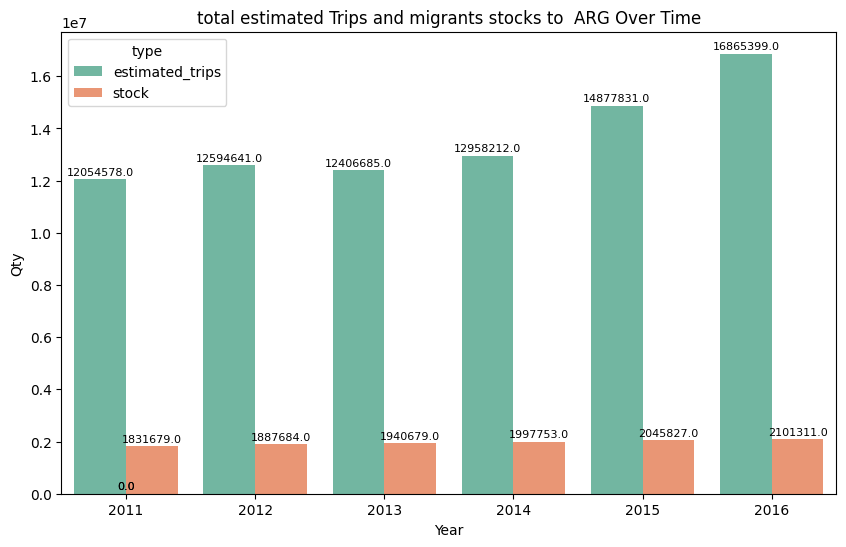

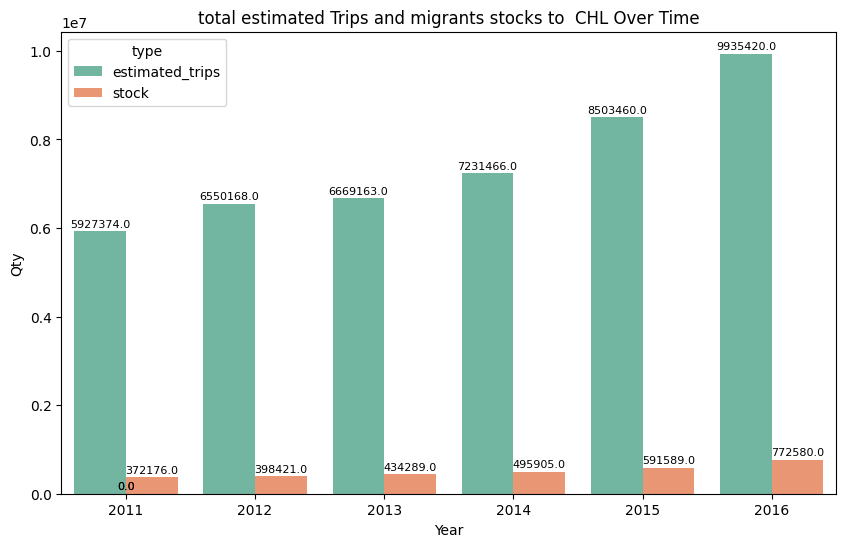

In [ ]:
melted_df = pd.melt(total_mov_mig, id_vars=['year', 'country_code'],
                    value_vars=['estimated_trips', 'stock'],
                    var_name='type', value_name='value_m')

melted_df['value_m'] = pd.to_numeric(melted_df['value_m'], errors='coerce').astype('Int64')

for country in melted_df['country_code'].unique():
    destination_data = melted_df[melted_df['country_code'] == country]

    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x='year', y='value_m', hue='type', data=destination_data, palette = "Set2")
    plt.title(f'total estimated Trips and migrants stocks to  {country} Over Time')
    plt.xlabel('Year')
    plt.ylabel('Qty')

    for p in ax.patches:
        ax.annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                    textcoords='offset points')
    plt.show()


**Movements and migratory stock of Bolivians to Argentina and Chile.**

In [ ]:
# Filter mouvements for source_iso3 'BOL' and target_iso2 'CHL' and 'ARG'
bol_mov = mobility_df[(mobility_df['source_iso3'] == 'BOL') & (mobility_df['target_iso3'].isin(['CHL', 'ARG']))]
bol_mov = bol_mov[['source_iso3', 'target_iso3', 'year', 'estimated_trips']]

#filter migration database for origin = BOL
bol_mig= latam_mig_df[(latam_mig_df['iso_or'] == 'BOL') & (latam_mig_df['iso_des'].isin(['CHL', 'ARG']))]
bol_mig = bol_mig[['iso_or', 'iso_des', 'year', 'stock']]


In [ ]:
# Rename columns for merging
bol_mov = bol_mov.rename(columns={'target_iso3': 'country_dest','source_iso3': 'country_source'})
bol_mig = bol_mig.rename(columns={'iso_des': 'country_dest', 'iso_or': 'country_source'})

# Merge the dataframes
bol_mov_mig = pd.merge(bol_mov, bol_mig, on=['country_source', 'country_dest', 'year'], how='left')

bol_mov_mig

,country_source,country_dest,year,estimated_trips,stock
0,BOL,ARG,2014,576578.0,411125
1,BOL,CHL,2013,460319.0,36745
2,BOL,ARG,2012,406932.0,389591
3,BOL,ARG,2016,668119.0,423108
4,BOL,ARG,2013,465051.0,401202
5,BOL,CHL,2016,522177.0,66310
6,BOL,ARG,2015,613185.0,418622
7,BOL,CHL,2014,484388.0,43684
8,BOL,CHL,2011,377832.0,28017
9,BOL,CHL,2015,504314.0,53312


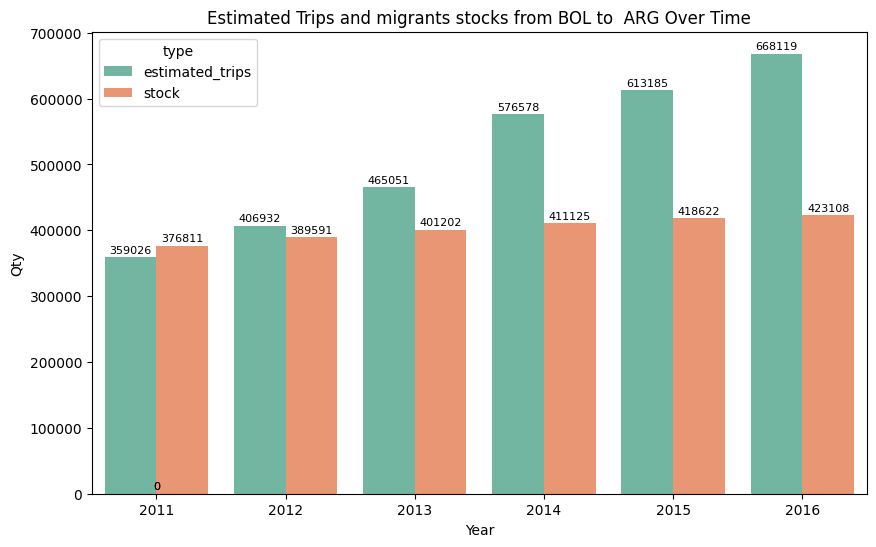

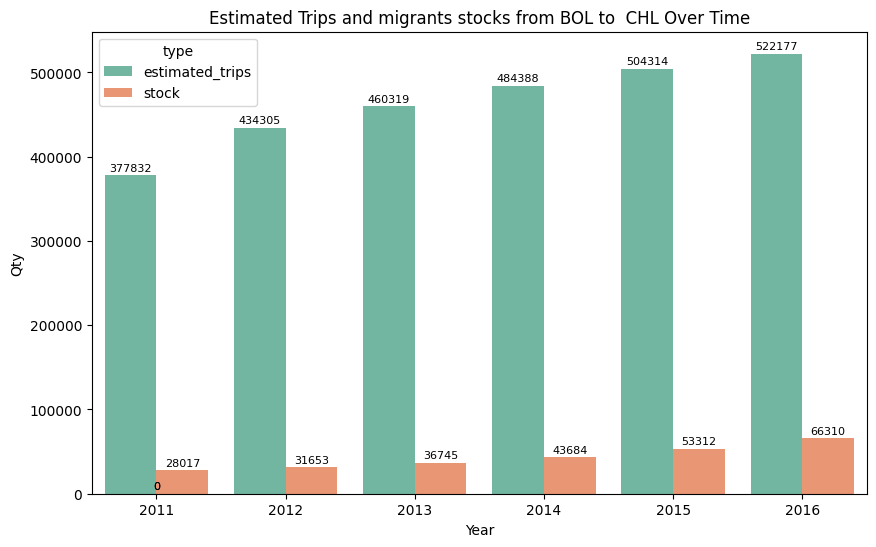

In [ ]:
melted_df = pd.melt(bol_mov_mig, id_vars=['year', 'country_dest'],
                    value_vars=['estimated_trips', 'stock'],
                    var_name='type', value_name='value_m')

melted_df['value_m'] = pd.to_numeric(melted_df['value_m'], errors='coerce').astype('Int64')

for country in melted_df['country_dest'].unique():
    destination_data = melted_df[melted_df['country_dest'] == country]

    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x='year', y='value_m', hue='type', data=destination_data, palette = "Set2")
    plt.title(f'Estimated Trips and migrants stocks from BOL to  {country} Over Time')
    plt.xlabel('Year')
    plt.ylabel('Qty')

    for p in ax.patches:
        ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                    textcoords='offset points')
    plt.show()

**Movements and migratory stock of Bolivians to Argentina and Chile.**

In [ ]:
# Filter mouvements for source_iso3 'BOL' and target_iso2 'CHL' and 'ARG'
ven_mov = mobility_df[(mobility_df['source_iso3'] == 'VEN') & (mobility_df['target_iso3'].isin(['CHL', 'ARG']))]
ven_mov = ven_mov[['source_iso3', 'target_iso3', 'year', 'estimated_trips']]

#filter migration database for origin = BOL
ven_mig= latam_mig_df[(latam_mig_df['iso_or'] == 'VEN') & (latam_mig_df['iso_des'].isin(['CHL', 'ARG']))]
ven_mig = ven_mig[['iso_or', 'iso_des', 'year', 'stock']]


In [ ]:
# Rename columns for merging
ven_mov = ven_mov.rename(columns={'target_iso3': 'country_dest','source_iso3': 'country_source'})
ven_mig = ven_mig.rename(columns={'iso_des': 'country_dest', 'iso_or': 'country_source'})

# Merge the dataframes
ven_mov_mig = pd.merge(ven_mov, ven_mig, on=['country_source', 'country_dest', 'year'], how='left')

ven_mov_mig

,country_source,country_dest,year,estimated_trips,stock
0,VEN,CHL,2013,56746.0,13951
1,VEN,CHL,2012,63198.0,10070
2,VEN,ARG,2016,83783.0,24999
3,VEN,CHL,2016,83651.0,133624
4,VEN,CHL,2011,83841.0,11040
5,VEN,ARG,2011,132276.0,0
6,VEN,CHL,2015,60878.0,54887
7,VEN,ARG,2014,138234.0,0
8,VEN,ARG,2012,128219.0,0
9,VEN,ARG,2015,125041.0,1420


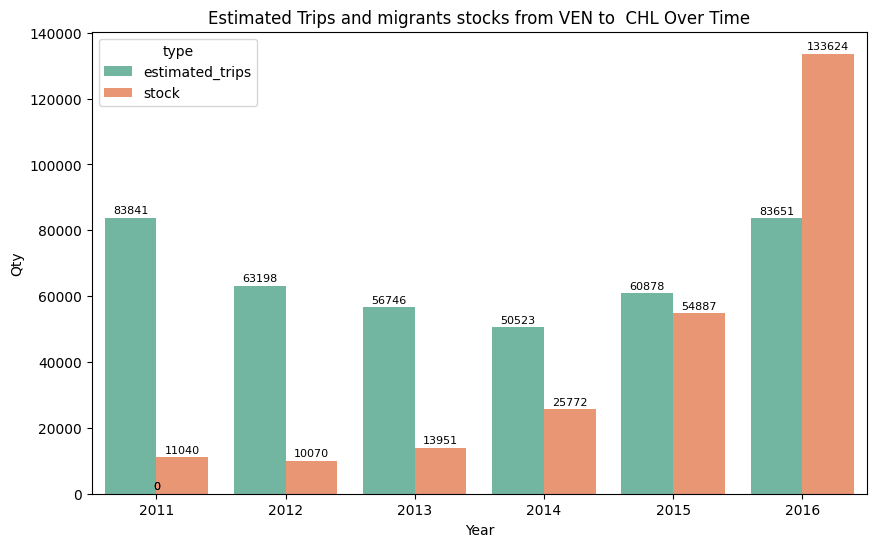

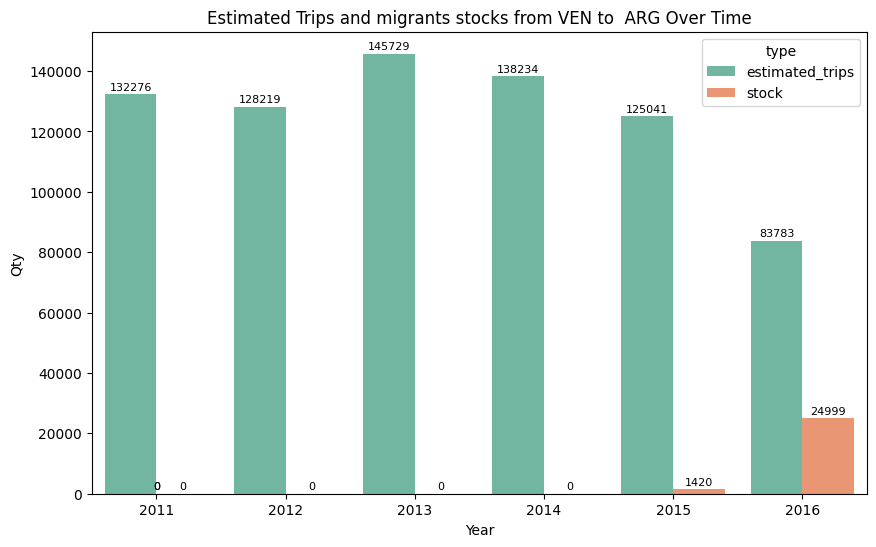

In [ ]:
melted_df = pd.melt(ven_mov_mig, id_vars=['year', 'country_dest'],
                    value_vars=['estimated_trips', 'stock'],
                    var_name='type', value_name='value_m')

melted_df['value_m'] = pd.to_numeric(melted_df['value_m'], errors='coerce').astype('Int64')

for country in melted_df['country_dest'].unique():
    destination_data = melted_df[melted_df['country_dest'] == country]

    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x='year', y='value_m', hue='type', data=destination_data, palette = "Set2")
    plt.title(f'Estimated Trips and migrants stocks from VEN to  {country} Over Time')
    plt.xlabel('Year')
    plt.ylabel('Qty')

    for p in ax.patches:
        ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                    textcoords='offset points')
    plt.show()